In [32]:
import cv2 
import os
import matplotlib.pyplot as plt
import skimage
#from skimage.feature import greycomatrix, greycoprops
import numpy as np
from sklearn.metrics.cluster import entropy
import pandas as pd

### load dataset

In [33]:
# load data from direction and save them into Imgs[] , Labels[]
dir = 'C:\\Users\\star\\Downloads\\The IQ-OTHNCCD lung cancer dataset\\The IQ-OTHNCCD lung cancer dataset\\Lung Cancer dataset'
classes = ['benign','malignant']
# load data from direction and save them into Imgs[] , Labels[]
Imgs = []
Lables = []
for category in os.listdir(dir):
    newPath = os.path.join(dir,category)
    for img in os.listdir(newPath):
        img_path = os.path.join(newPath,img)
        if 'Thumbs.db' not in img_path:
            #print(img_path) 
            Imgs.append(cv2.imread(img_path,0))
            Lables.append(classes.index(category))

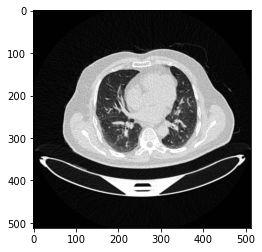

In [34]:
plt.imshow(Imgs[0], cmap='gray')

### Calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135  for all properties 

In [35]:
features=[]
def GLCM_all_angls(image):
  GLCM = skimage.feature.graycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])

  props = ['dissimilarity', 'contrast', 'homogeneity', 'energy', 'correlation','entropy']
  angl_nums = [0, 1, 2,3]
     
  for f in props:
    for x in angl_nums:
        if (f=="entropy"):
            features.append(entropy(GLCM))
        else:    
            features.append(skimage.feature.graycoprops(GLCM, f)[0,x])
         

  return features
 

### Call GLCM_all_angls for all images 

In [40]:
for i in range(len(Imgs)):
    GLCM_all_angls (Imgs[i])
    features.append(Lables[i])
print("Done, All properties have been successfully calculated for all images")    

Done, All properties have been successfully calculated for all images


In [23]:
# Create columns names to store features in df
columns = []
props = ['dissimilarity', 'contrast', 'homogeneity', 'energy', 'correlation',' entropy']
angles = ['0', '45', '90','135']
for name in props:
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")
columns

['dissimilarity_0',
 'dissimilarity_45',
 'dissimilarity_90',
 'dissimilarity_135',
 'contrast_0',
 'contrast_45',
 'contrast_90',
 'contrast_135',
 'homogeneity_0',
 'homogeneity_45',
 'homogeneity_90',
 'homogeneity_135',
 'energy_0',
 'energy_45',
 'energy_90',
 'energy_135',
 'correlation_0',
 'correlation_45',
 'correlation_90',
 'correlation_135',
 ' entropy_0',
 ' entropy_45',
 ' entropy_90',
 ' entropy_135',
 'label']

### Create the pandas DataFrame for GLCM features data

In [24]:
# reshape features 
features=np.array(features).reshape(len(Imgs),len(columns))  
# make glcm_df with features and columns name:
glcm_df = pd.DataFrame(features,columns = columns)

In [25]:
glcm_df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,contrast_0,contrast_45,contrast_90,contrast_135,homogeneity_0,homogeneity_45,...,energy_135,correlation_0,correlation_45,correlation_90,correlation_135,entropy_0,entropy_45,entropy_90,entropy_135,label
0,5.493349,7.771267,6.612956,8.215628,106.600722,271.109129,203.237054,289.112078,0.338710,0.308815,...,0.158701,0.990847,0.976741,0.982549,0.975196,1.240436,1.240436,1.240436,1.240436,0.0
1,5.794448,8.486380,6.596873,8.198483,118.809584,310.281226,211.004812,296.410821,0.299777,0.265778,...,0.112899,0.988153,0.969091,0.978960,0.970473,1.217390,1.217390,1.217390,1.217390,0.0
2,5.456202,8.026340,6.651721,8.239621,110.008565,293.922626,209.683804,293.000509,0.311409,0.274513,...,0.112997,0.989012,0.970671,0.979056,0.970763,1.211512,1.211512,1.211512,1.211512,0.0
3,5.444414,8.159547,6.333308,7.675641,110.844908,296.515382,199.437645,274.311361,0.313610,0.272366,...,0.113165,0.988913,0.970371,0.980051,0.972589,1.178232,1.178232,1.178232,1.178232,0.0
4,5.174619,7.448520,5.922788,7.558714,105.697568,278.885149,191.918110,271.788048,0.323800,0.290373,...,0.114209,0.989263,0.971700,0.980505,0.972420,1.152915,1.152915,1.152915,1.152915,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.715799,4.994439,4.126475,4.857951,48.958010,195.540431,147.575190,184.567610,0.496135,0.421480,...,0.115683,0.994719,0.978932,0.984082,0.980115,1.001684,1.001684,1.001684,1.001684,1.0
96,4.054152,6.471406,5.252653,6.595057,74.786226,227.005848,166.435933,234.782419,0.367477,0.311517,...,0.064318,0.993066,0.978968,0.984569,0.978247,1.150307,1.150307,1.150307,1.150307,1.0
97,4.073699,6.540531,5.314969,6.636249,75.344209,229.694027,169.114183,238.154802,0.368081,0.308460,...,0.064543,0.993013,0.978713,0.984316,0.977929,1.160077,1.160077,1.160077,1.160077,1.0
98,3.438066,5.669709,4.470631,5.637325,69.817301,218.683323,156.110017,217.189525,0.448512,0.383281,...,0.073911,0.993824,0.980667,0.986192,0.980799,1.103894,1.103894,1.103894,1.103894,1.0


In [26]:
glcm_df.to_csv("glcm_df.csv")

## Dissimilarity
Dissimilarity is a measure of distance between pairs of objects (pixels) in the region of interest.
## Contrast
Contrast is a measure of the local intensity variation, favoring values away from the diagonal (i=j).
A larger value correlates with a greater disparity in intensity values among neighboring voxels.

## Correlation
Correlation is a value between 0 (uncorrelated) and 1 (perfectly correlated) showing the linear dependency of gray level values to their respective voxels in the GLCM.

## Maximum Probability
Maximum Probability is occurrences of the most predominant pair of neighboring intensity values.

## Homogeneity
Homogeneity measures the density of the distribution of the elements in the co-occurrence matrix and the elements in its diagonal.

## Energy
Energy is a measure of uniformity of the image. Thus it has an inverse relation with entropy.
A high energy value means high uniformity in the image. 

## Entropy
Entropy is a measure of the disorder in a grayscale image. As the entropy rises, the disorder in the image rises